# Delivery 1 - Bouncer by Daniel Bruna and Daniel Peco

## 1. Introduction

### Aim of the notebook
In this notebook, we will explain how the Bouncer scene in the project ml-agents works and show all the different paremeters you can mess around with and their respective analysed outcomes with the help of tensorboards.

Furthermore, we will also modify the case to make a new one which involves more complexity and challenge to the agent.

### Team involved

 - Daniel Bruna Triviño (danielbrunatrivino@enti.com) 
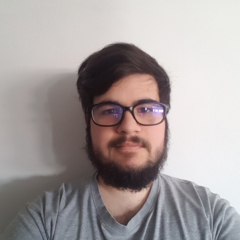
    
- Daniel Peco Regales (danielpecoregales@enti.com)
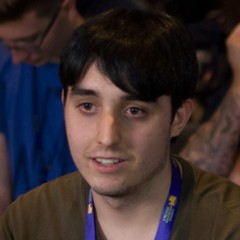

## 2. Case analysis


## 3. Performance analysis


## 4. New case proposal
